In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from Bio import SeqIO
DNAseq = SeqIO.read('533438_976277_bundle_archive/MN908947.fna', 'fasta')
DNA = DNAseq.seq
mRNA = DNA.transcribe()
nt = len(mRNA)

In [97]:
amino_acids = mRNA.translate(table=1, cds=False)

In [ ]:
Proteins = amino_acids.split('*')
cov2_df = pd.DataFrame(Proteins)

In [ ]:
def conv(item):
    return len(item)

def to_str(item):
    return str(item)

cov2_df['sequence_str'] = cov2_df[0].apply(to_str)
cov2_df['length'] = cov2_df[0].apply(conv)
cov2_df.rename(columns={0:"sequence"}, inplace=True)
cov2_df.head()

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(111)
plt.hist(cov2_df['length'])
plt.title('Length of proteins -- histogram')

plt.figure(figsize=(20,5))
wo = cov2_df.loc[cov2_df['length']<60]
plt.subplot(121)
plt.hist(wo['length'])
plt.title('Length of proteins (where < 60)')

wo = cov2_df.loc[cov2_df['length'] > 1000]
plt.subplot(122)
plt.hist(wo['length'])
plt.title('Length of proteins (where > 1000)')

In [59]:
functional_proteins = cov2_df.loc[cov2_df['length']>=20]
functional_proteins.describe()

,length
count,80.000000
mean,67.262500
std,299.955767
min,20.000000
25%,22.000000
50%,25.000000
75%,36.000000
max,2701.000000


In [60]:
large_protein = functional_proteins.loc[functional_proteins['length']>2700]
l = large_protein['sequence'].to_list()[0]

## Comparing Human Coronavirus
#### Using pairwise alignment to find similarities between genomes.

In [61]:
from Bio import pairwise2

SARS = SeqIO.read('533438_976277_bundle_archive/datasets_559987_1018369_sars.fasta', 'fasta')
MERS = SeqIO.read('533438_976277_bundle_archive/datasets_559987_1018369_mers.fasta', 'fasta')
COV2 = SeqIO.read('533438_976277_bundle_archive/datasets_559987_1018369_cov2.fasta', 'fasta')

print('DNA Nucleotide Lengths:')
print('SARS', len(SARS.seq))
print('MERS', len(MERS.seq))
print('COV2', len(COV2.seq))

Sequence Lengths:
SARS 29751
MERS 30119
COV2 29903


In [63]:
print('Amino Acids Lengths')
sars_amino_acids = SARS.seq.transcribe().translate()
print('SARS', len(sars_amino_acids))
mers_amino_acids = MERS.seq.transcribe().translate()
print('MERS', len(mers_amino_acids))
print('COV2', len(amino_acids))

Amino Acids Lengths
SARS 9917
MERS 10039
COV2 9967


In [74]:
SARSProteins = sars_amino_acids.split('*')
MERSProteins = mers_amino_acids.split('*')

sars_df = pd.DataFrame(SARSProteins)
sars_df['sequence_str'] = sars_df[0].apply(to_str)
sars_df['length'] = sars_df[0].apply(conv)
sars_df.rename(columns={0:"sequence"}, inplace=True)
mers_df = pd.DataFrame(MERSProteins)
mers_df['sequence_str'] = mers_df[0].apply(to_str)
mers_df['length'] = mers_df[0].apply(conv)
mers_df.rename(columns={0:"sequence"}, inplace=True)
print('Protein Count')
print('SARS', len(sars_df))
print('MERS', len(mers_df))
print('COV2', len(cov2_df))

Protein Count
SARS 273
MERS 690
COV2 775


Text(0.5, 1.0, 'MERS Proteins')

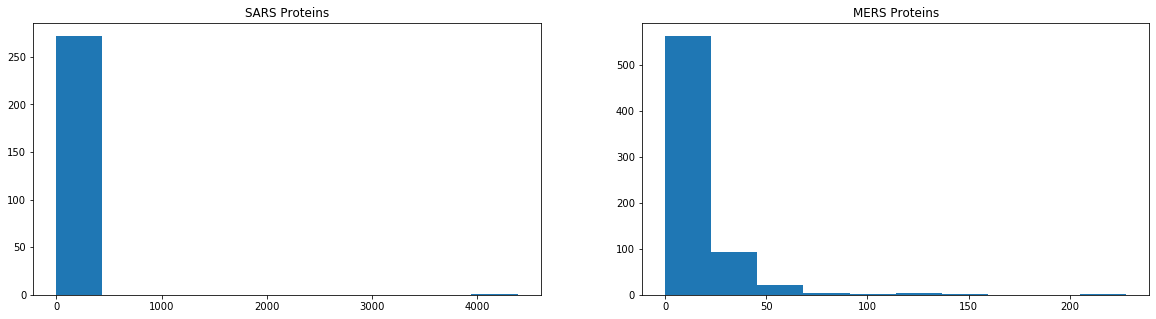

In [95]:
sars_func_pro = sars_df.loc[sars_df['length'] > 20]
mers_func_pro = mers_df.loc[mers_df['length'] > 20]
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(sars_df['length'])
plt.title('SARS Proteins')
plt.subplot(122)
plt.hist(mers_df['length'])
plt.title('MERS Proteins')


In [98]:
SARS_COV = pairwise2.align.globalxx(SARS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('SARS-COV Similarity:', SARS_COV / le|n(SARS.seq)*100)
MERS_COV = pairwise2.align.globalxx(MERS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('MERS-COV Similarity:', MERS_COV / len(MERS.seq)*100)
MERS_SARS = pairwise2.align.globalxx(MERS.seq, SARS.seq, one_alignment_only=True, score_only=True)
print('MERS-SARS Similarity:', MERS_SARS / len(SARS.seq)*100)

MemoryError: Out of memory